In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from xgboost import XGBClassifier

import shap

import import_ipynb
# Auxiliar functions
from Auxiliar_functions import *

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Baseline Model

In [111]:
df_cardiovascular = pd.read_csv('Cardiovascular_Disease_Dataset.csv')

In [70]:
X = df_cardiovascular.drop(columns=["patientid","target","noofmajorvessels"])
y = df_cardiovascular["target"]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
models = models_training(X_train,y_train)

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Matriz de Confusion para random_forest
[[ 82   1]
 [  4 113]]
Matriz de Confusion para logistic_regression
[[ 75   8]
 [  3 114]]
Matriz de Confusion para Decision_tree
[[ 78   5]
 [  5 112]]
Matriz de Confusion para Naive_Bayes
[[ 81   2]
 [  2 115]]
Matriz de Confusion para xgboost
[[ 79   4]
 [  3 114]]


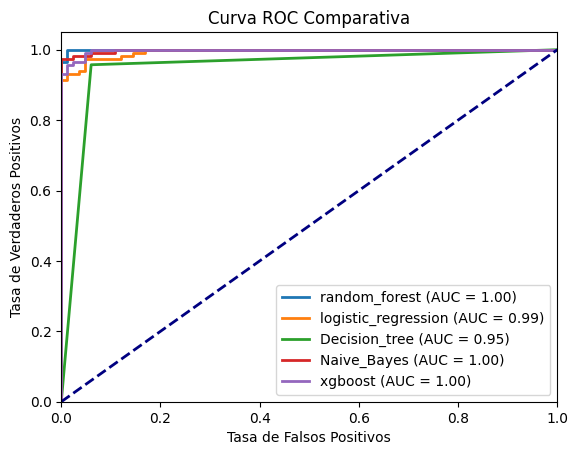


Métricas de Rendimiento para cada Modelo:
                     accuracy  precision    recall        f1    pr_auc
random_forest           0.975   0.991228  0.965812  0.978355  0.999588
logistic_regression     0.945   0.934426  0.974359  0.953975  0.994130
Decision_tree           0.950   0.957265  0.957265  0.957265  0.948512
Naive_Bayes             0.980   0.982906  0.982906  0.982906  0.998352
xgboost                 0.965   0.966102  0.974359  0.970213  0.997735


In [53]:
modelos(X_test,y_test,models)

## Validacion con otro dataset

In [11]:
df_cardiovascular_2 = pd.read_csv("Cardiovascular_Disease_Dataset_2_Filtered.csv")
df_cardiovascular_2

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,target
0,40,1,1,140,289,0,0,172,0,0.0,1,0
1,49,0,2,160,180,0,0,156,0,1.0,2,1
2,37,1,1,130,283,0,1,98,0,0.0,1,0
3,48,0,3,138,214,0,0,108,1,1.5,2,1
4,54,1,2,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
741,45,1,0,110,264,0,0,132,0,1.2,2,1
742,68,1,3,144,193,1,0,141,0,3.4,2,1
743,57,1,3,130,131,0,0,115,1,1.2,2,1
744,57,0,1,130,236,0,2,174,0,0.0,2,1


Matriz de Confusion para random_forest
[[233 157]
 [ 21 335]]
Matriz de Confusion para logistic_regression
[[ 46 344]
 [  2 354]]
Matriz de Confusion para Decision_tree
[[169 221]
 [ 17 339]]
Matriz de Confusion para Naive_Bayes
[[208 182]
 [ 13 343]]
Matriz de Confusion para xgboost
[[168 222]
 [ 14 342]]


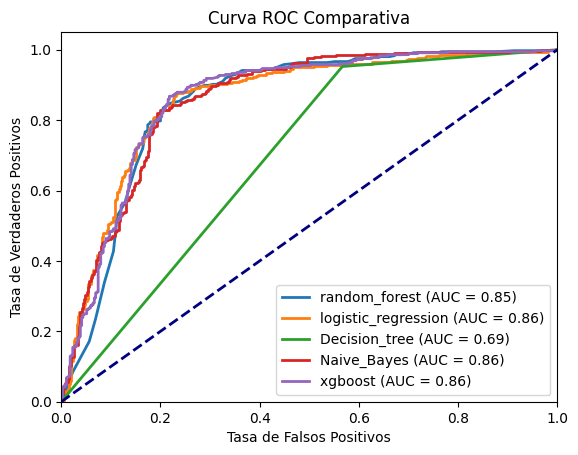


Métricas de Rendimiento para cada Modelo:
                     accuracy  precision    recall        f1    pr_auc
random_forest        0.761394   0.680894  0.941011  0.790094  0.851203
logistic_regression  0.536193   0.507163  0.994382  0.671727  0.858492
Decision_tree        0.680965   0.605357  0.952247  0.740175  0.692790
Naive_Bayes          0.738606   0.653333  0.963483  0.778661  0.858650
xgboost              0.683646   0.606383  0.960674  0.743478  0.860400


In [55]:
X = df_cardiovascular_2.drop(columns=['target'])
y = df_cardiovascular_2['target']
modelos(X,y,models)

## Limpieza de los datos

In [ ]:
df_cardiovascualar= df_cardiovascular[df_cardiovascular["serumcholestrol"] != 0]
df_cardiovascualar= df_cardiovascular[df_cardiovascular["slope"] != 0]

In [57]:
df_cardiovascular.info()

<class 'pandas.core.frame.DataFrame'>
Index: 767 entries, 1 to 998
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          767 non-null    int64  
 1   age                767 non-null    int64  
 2   gender             767 non-null    int64  
 3   chestpain          767 non-null    int64  
 4   restingBP          767 non-null    int64  
 5   serumcholestrol    767 non-null    int64  
 6   fastingbloodsugar  767 non-null    int64  
 7   restingrelectro    767 non-null    int64  
 8   maxheartrate       767 non-null    int64  
 9   exerciseangia      767 non-null    int64  
 10  oldpeak            767 non-null    float64
 11  slope              767 non-null    int64  
 12  noofmajorvessels   767 non-null    int64  
 13  target             767 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 89.9 KB


In [58]:
df_cardiovascular.target.value_counts()

target
1    527
0    240
Name: count, dtype: int64

In [59]:
(df_cardiovascular.target.value_counts()/len(df_cardiovascualar))*100

target
1    68.709257
0    31.290743
Name: count, dtype: float64

In [ ]:
df_cardiovascular.to_csv('Cardiovascular_Disease_Dataset_Filtered.csv', index=False)

## Normalización y Balanceo

In [3]:
df_cardiovascular = pd.read_csv('Cardiovascular_Disease_Dataset_Filtered.csv')

In [4]:
X = df_cardiovascular.drop(columns=["patientid","noofmajorvessels","target"])
y = df_cardiovascular["target"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
pipeline = Pipeline([('scaler', MinMaxScaler()),('oversampling', SMOTE())])

In [7]:
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

In [8]:
models = models_training(X_train_resampled,y_train_resampled)

Matriz de Confusion para random_forest
[[ 38   2]
 [  4 110]]
Matriz de Confusion para logistic_regression
[[ 39   1]
 [  6 108]]
Matriz de Confusion para Decision_tree
[[ 38   2]
 [  4 110]]
Matriz de Confusion para Naive_Bayes
[[ 36   4]
 [  5 109]]
Matriz de Confusion para xgboost
[[ 38   2]
 [  4 110]]


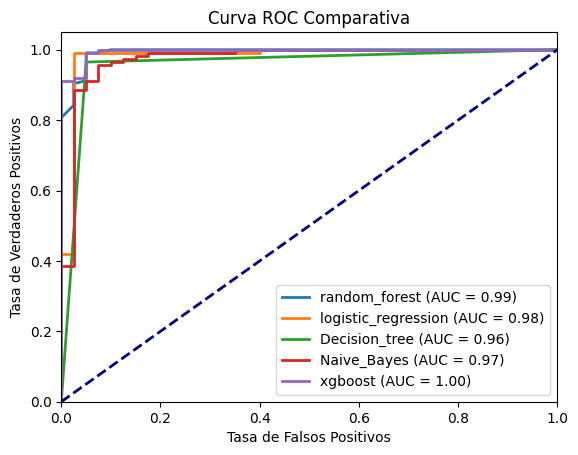


Métricas de Rendimiento para cada Modelo:
                     accuracy  precision    recall        f1    pr_auc
random_forest        0.961039   0.982143  0.964912  0.973451  0.992982
logistic_regression  0.954545   0.990826  0.947368  0.968610  0.982237
Decision_tree        0.961039   0.982143  0.964912  0.973451  0.957456
Naive_Bayes          0.941558   0.964602  0.956140  0.960352  0.975000
xgboost              0.961039   0.982143  0.964912  0.973451  0.995614


In [9]:
scaler = pipeline.named_steps['scaler']
X_test_scaled = scaler.transform(X_test)
modelos(X_test_scaled,y_test,models)

Using 154 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SHAP explicación para random_forest


100%|██████████| 154/154 [02:15<00:00,  1.14it/s]


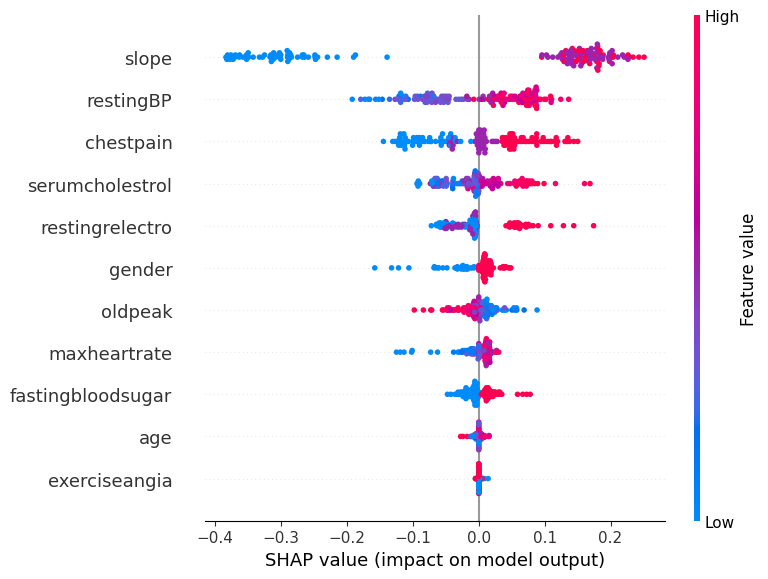

Using 154 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SHAP explicación para logistic_regression


100%|██████████| 154/154 [00:07<00:00, 20.22it/s]


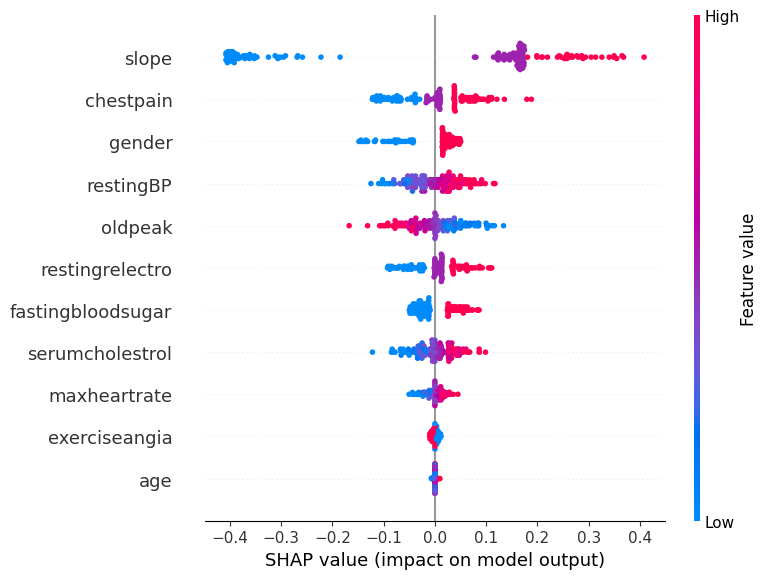

Using 154 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SHAP explicación para Decision_tree


100%|██████████| 154/154 [00:06<00:00, 22.90it/s]


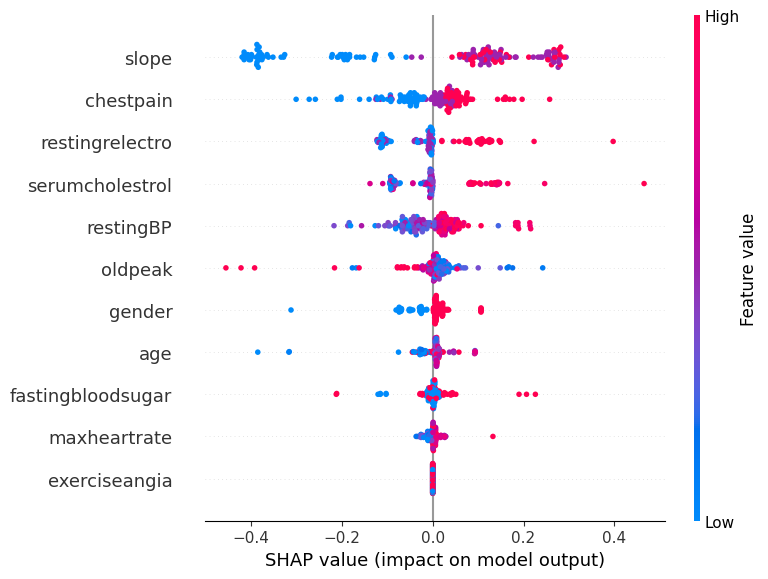

Using 154 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SHAP explicación para Naive_Bayes


100%|██████████| 154/154 [00:22<00:00,  6.90it/s]


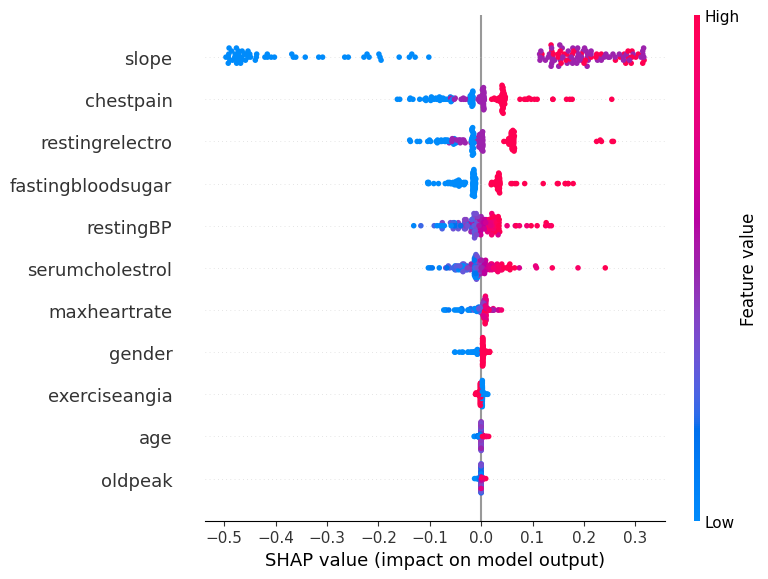

Using 154 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SHAP explicación para xgboost


100%|██████████| 154/154 [00:14<00:00, 10.28it/s]


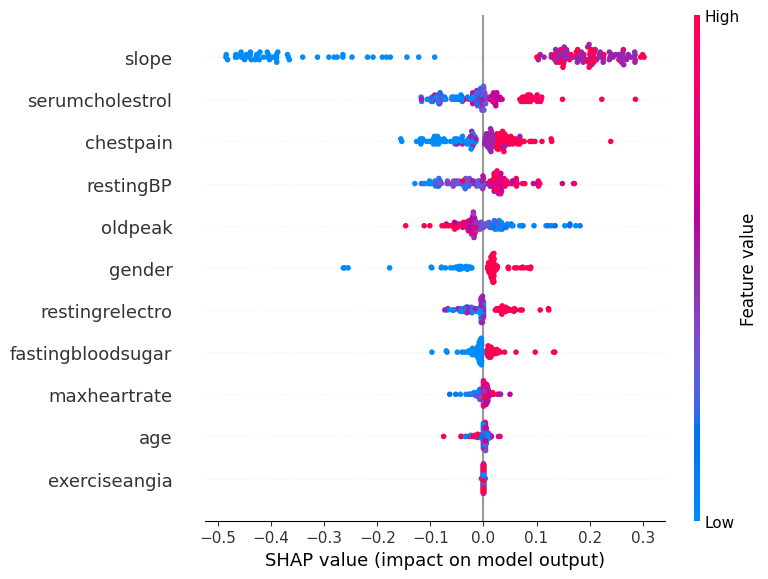

In [151]:
X_test = pd.DataFrame(X_test_scaled, columns=df_cardiovascular.drop(columns=["patientid","noofmajorvessels","target"]).columns)
for name,model in models.items():
    print(f"SHAP explicación para {name}")
    explainer = shap.KernelExplainer(model=model.predict_proba, data=X_test)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values[:,:,1], X_test)

## Validacion con otro dataset

In [12]:
X = df_cardiovascular_2.drop(columns=['target'])
y = df_cardiovascular_2['target']

Matriz de Confusion para random_forest
[[217 173]
 [ 20 336]]
Matriz de Confusion para logistic_regression
[[230 160]
 [ 17 339]]
Matriz de Confusion para Decision_tree
[[166 224]
 [ 12 344]]
Matriz de Confusion para Naive_Bayes
[[216 174]
 [  7 349]]
Matriz de Confusion para xgboost
[[176 214]
 [ 12 344]]


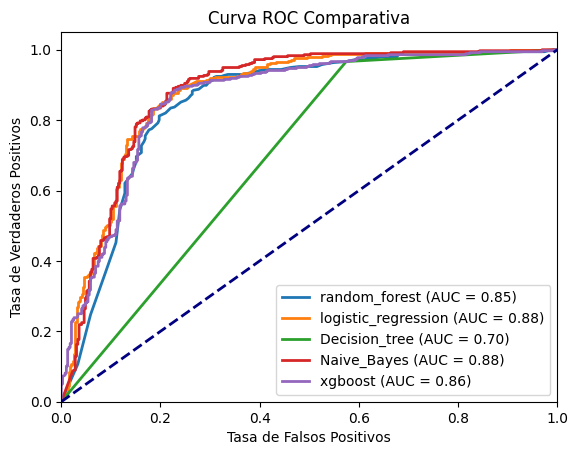


Métricas de Rendimiento para cada Modelo:
                     accuracy  precision    recall        f1    pr_auc
random_forest        0.741287   0.660118  0.943820  0.776879  0.851570
logistic_regression  0.762735   0.679359  0.952247  0.792982  0.878140
Decision_tree        0.683646   0.605634  0.966292  0.744589  0.695967
Naive_Bayes          0.757373   0.667304  0.980337  0.794084  0.880164
xgboost              0.697051   0.616487  0.966292  0.752735  0.863840


In [13]:
X_test_scaled = scaler.transform(X)
modelos(X_test_scaled,y,models)

Using 150 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SHAP explicación para random_forest


100%|██████████| 100/100 [01:22<00:00,  1.21it/s]


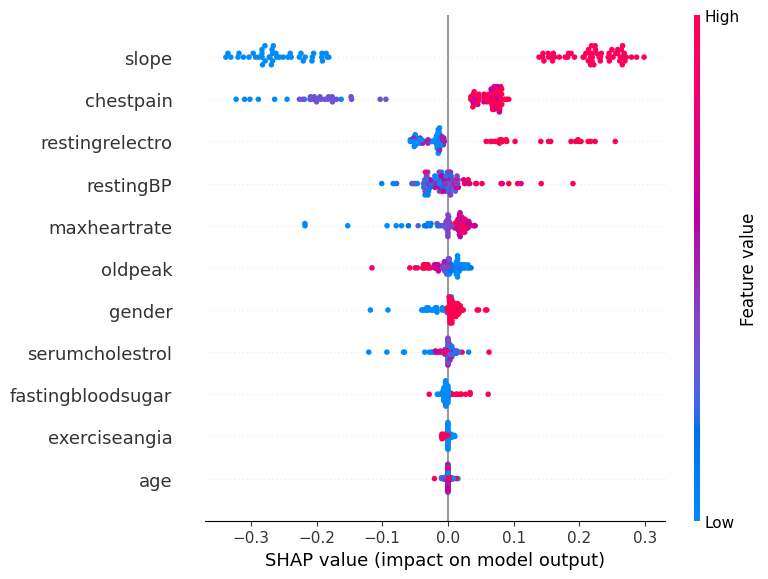

Using 150 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SHAP explicación para logistic_regression


100%|██████████| 100/100 [00:04<00:00, 20.61it/s]


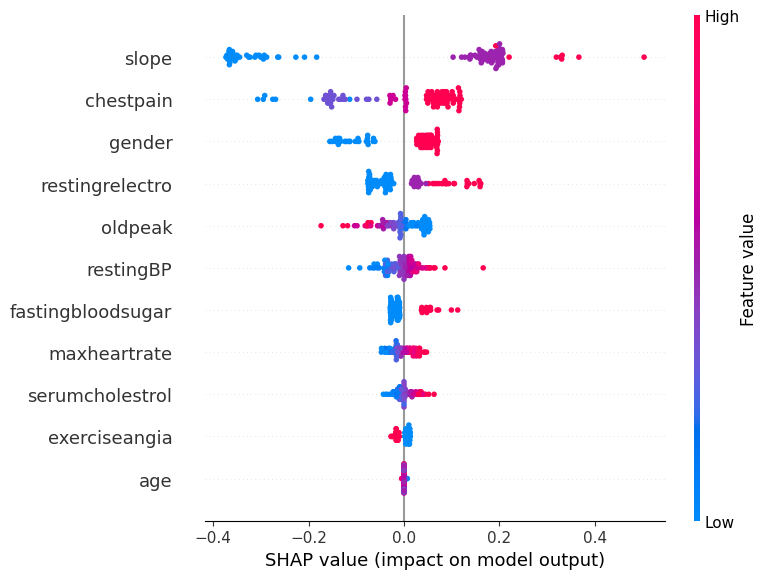

Using 150 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SHAP explicación para Decision_tree


100%|██████████| 100/100 [00:04<00:00, 23.53it/s]


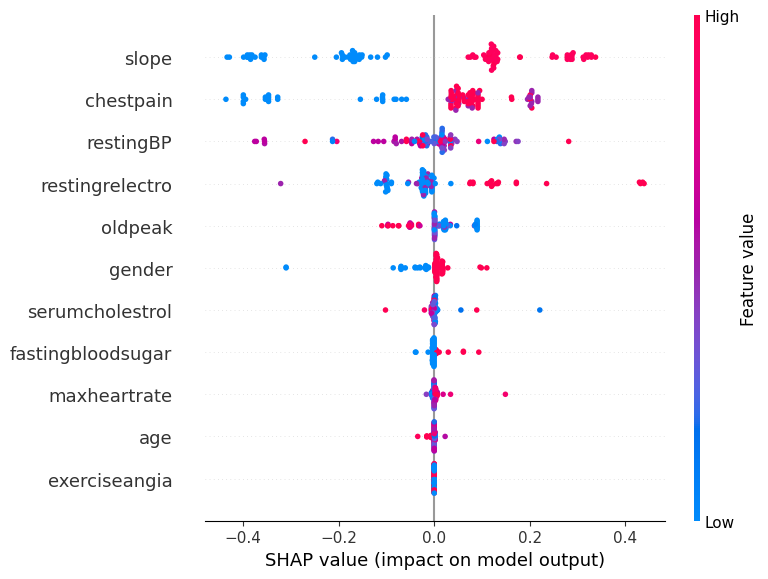

Using 150 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SHAP explicación para Naive_Bayes


100%|██████████| 100/100 [00:14<00:00,  6.86it/s]


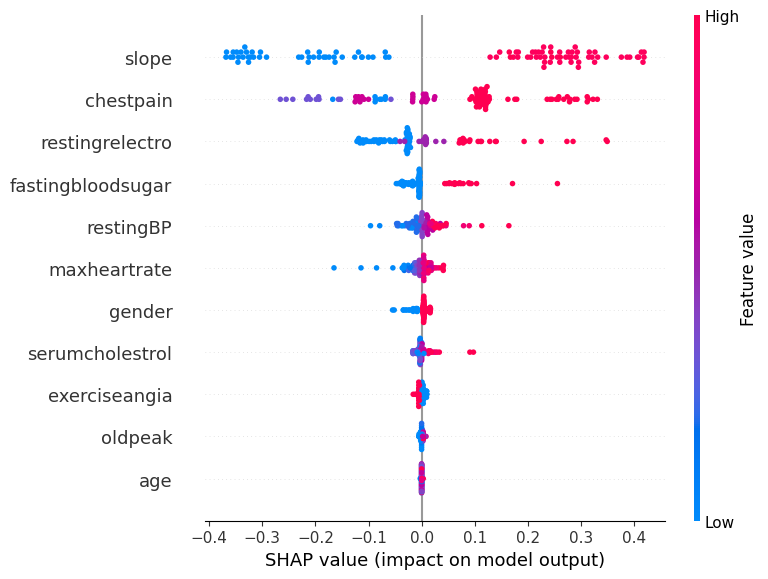

Using 150 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SHAP explicación para xgboost


100%|██████████| 100/100 [00:09<00:00, 10.29it/s]


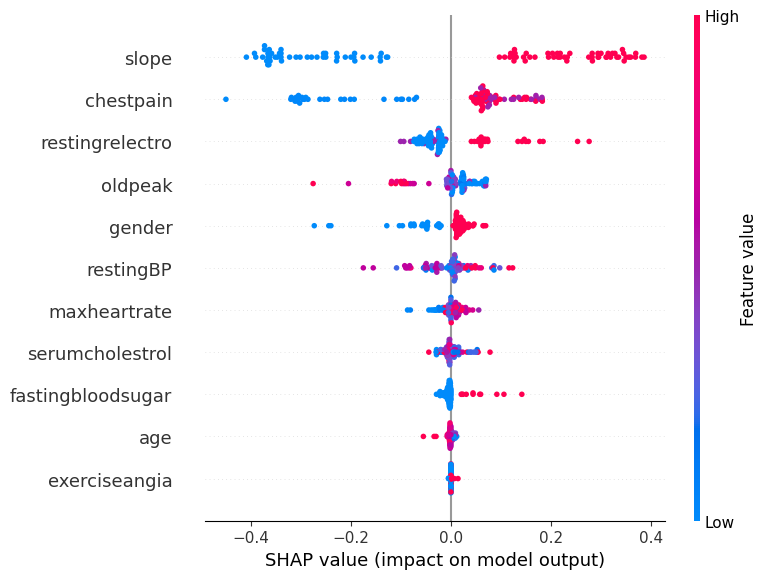

In [18]:
X_test = pd.DataFrame(X_test_scaled, columns=df_cardiovascular.drop(columns=["patientid","noofmajorvessels","target"]).columns)
for name,model in models.items():
    background = X_test.iloc[np.random.choice(X_test.shape[0], 150, replace=False)]
    X_sample = X_test.iloc[np.random.choice(X_test.shape[0], 100, replace=False)]
    print(f"SHAP explicación para {name}")
    explainer = shap.KernelExplainer(model=model.predict_proba, data=background)
    shap_values = explainer.shap_values(X_sample)
    shap.summary_plot(shap_values[:,:,1], X_sample)

## Tuneo de hiperparámetros

In [58]:
X = df_cardiovascular.drop(columns=["patientid","noofmajorvessels","target"])
y = df_cardiovascular["target"]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
pipeline = Pipeline([('scaler', MinMaxScaler()),('oversampling', SMOTE()),('xgb', XGBClassifier(random_state=42))])

In [61]:
param_grid = {
    'xgb__max_depth': [3, 5, 7],
    'xgb__min_child_weight': [1, 3, 5],
    'xgb__subsample': [0.6, 0.8, 1.0],
    'xgb__n_estimators': [50, 100, 150, 200],
    'xgb__learning_rate': [0.01, 0.1, 0.3]
}


In [62]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'xgb__learning_rate': [0.01, 0.1, ...], 'xgb__max_depth': [3, 5, ...], 'xgb__min_child_weight': [1, 3, ...], 'xgb__n_estimators': [50, 100, ...], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,feature_range,"(0, ...)"


In [63]:
xgb_best = grid_search.best_estimator_
xgb_best

,steps,"[('scaler', ...), ('oversampling', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,feature_range,"(0, ...)"
,copy,True
,clip,False
,sampling_strategy,'auto'
,random_state,None
,k_neighbors,5
,objective,'binary:logistic'


In [64]:
models = {'xgboost': xgb_best}

Matriz de Confusion para xgboost
[[ 38   2]
 [  4 110]]


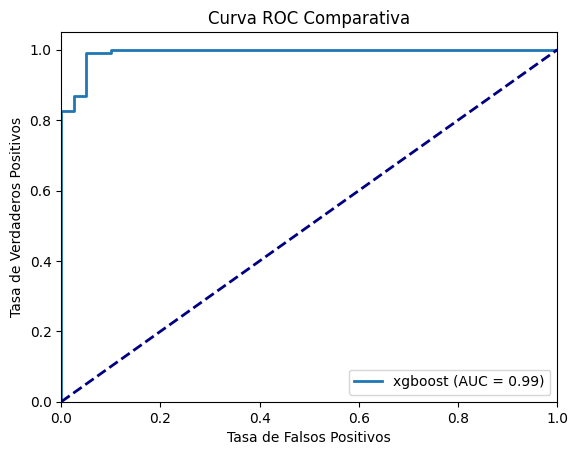


Métricas de Rendimiento para cada Modelo:
         accuracy  precision    recall        f1    pr_auc
xgboost  0.961039   0.982143  0.964912  0.973451  0.991886


In [65]:
modelos(X_test,y_test,models)

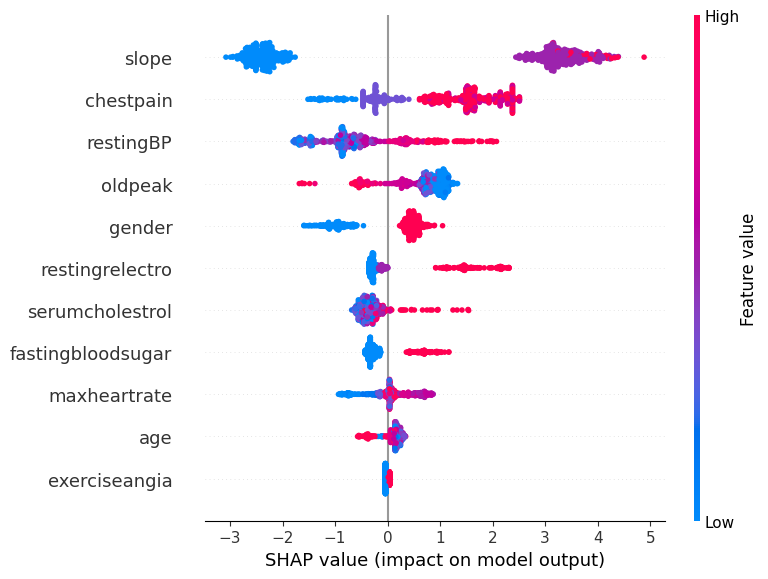

In [75]:
explainer = shap.TreeExplainer(xgb_best.named_steps['xgb'])
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

## Validacion con otro dataset

In [76]:
X = df_cardiovascular_2.drop(columns=['target'])
y = df_cardiovascular_2['target']

Matriz de Confusion para xgboost
[[210 180]
 [ 16 340]]


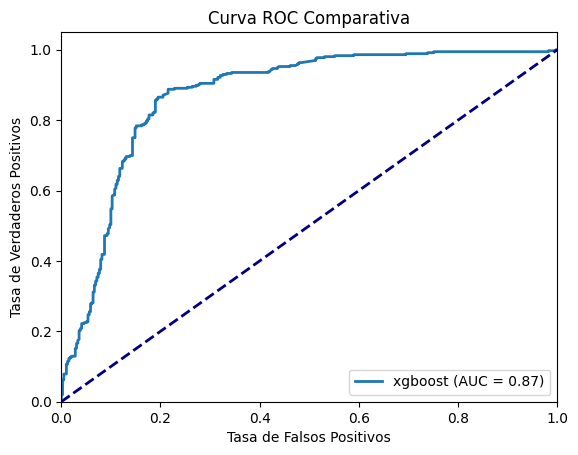


Métricas de Rendimiento para cada Modelo:
         accuracy  precision    recall        f1    pr_auc
xgboost  0.737265   0.653846  0.955056  0.776256  0.871186


In [77]:
modelos(X,y,models)

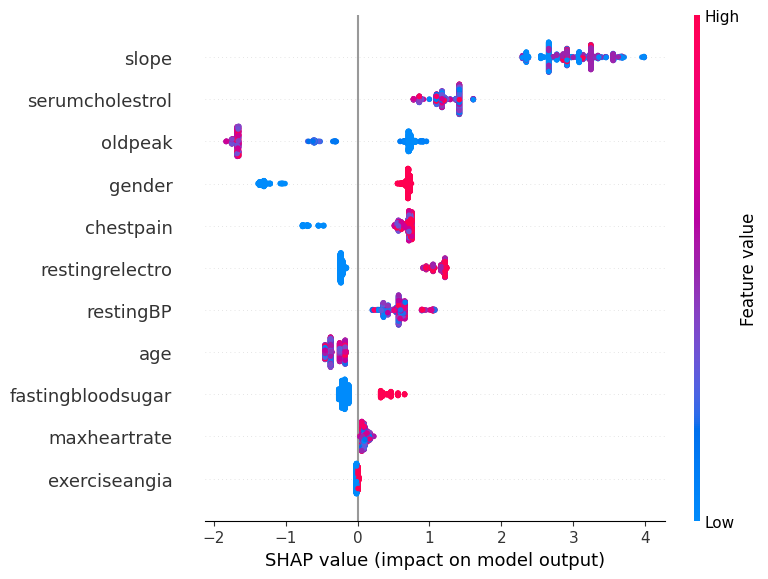

In [78]:
explainer = shap.TreeExplainer(xgb_best.named_steps['xgb'])
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)